# Geoprocessing Notebook

This notebook processes multiple data sources into a single layer for mapping and analysis.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import geopandas as gpd

## Census Tract Data

In [2]:
# Read in the 2021 census tract shapefiles for California

census_tracts_gdf = gpd.read_file("data/census/census_tracts/tl_2021_06_tract.shp")

print(census_tracts_gdf.shape)
census_tracts_gdf.head()

(9129, 13)


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,085,504321,06085504321,5043.21,Census Tract 5043.21,G5020,S,1450237,0,+37.3931319,-121.8651427,"POLYGON ((-121.87556 37.39924, -121.87535 37.3..."
1,06,085,504410,06085504410,5044.10,Census Tract 5044.10,G5020,S,1102136,0,+37.4093719,-121.8788884,"POLYGON ((-121.88886 37.40758, -121.88576 37.4..."
2,06,085,507003,06085507003,5070.03,Census Tract 5070.03,G5020,S,9529865,0,+37.2199936,-121.9979512,"POLYGON ((-122.02489 37.21683, -122.02459 37.2..."
3,06,085,507004,06085507004,5070.04,Census Tract 5070.04,G5020,S,2424447,0,+37.2260144,-121.9763816,"POLYGON ((-121.99304 37.22562, -121.99249 37.2..."
4,06,085,502204,06085502204,5022.04,Census Tract 5022.04,G5020,S,331145,0,+37.3013832,-121.9258424,"POLYGON ((-121.93167 37.29803, -121.92801 37.3..."


(621, 2)


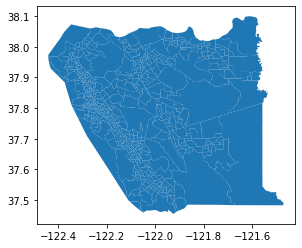

In [3]:
# Filter the data to just Alameda and Contra Costa counties

# FIPS codes
alameda = "001"
contra_costa = "013"

# Filter the data
census_tracts_gdf = census_tracts_gdf.loc[census_tracts_gdf["COUNTYFP"].isin([alameda, contra_costa])]

# Drop the extraneous columns
census_tracts_gdf = census_tracts_gdf[["GEOID", "geometry"]]

print(census_tracts_gdf.shape)
census_tracts_gdf.plot();

In [4]:
# Reproject the CRS to NAD83 for CA Zone 3

census_tracts_gdf.to_crs(2227, inplace=True)
census_tracts_gdf.crs

<Projected CRS: EPSG:2227>
Name: NAD83 / California zone 3 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Alameda; Calaveras; Contra Costa; Madera; Marin; Mariposa; Merced; Mono; San Francisco; San Joaquin; San Mateo; Santa Clara; Santa Cruz; Stanislaus; Tuolumne.
- bounds: (-123.02, 36.73, -117.83, 38.71)
Coordinate Operation:
- name: SPCS83 California zone 3 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
# Add the census data to the accessibility layer

access_gdf = census_tracts_gdf.reset_index(drop=True)

print(access_gdf.shape)
access_gdf.head()

(621, 2)


,GEOID,geometry
0,06001428301,"POLYGON ((6052475.926 2095914.933, 6052663.072..."
1,06001428302,"POLYGON ((6052287.465 2096919.257, 6052335.227..."
2,06001428400,"POLYGON ((6050238.370 2096212.064, 6052054.809..."
3,06001430900,"POLYGON ((6101137.659 2081426.591, 6101182.977..."
4,06001431000,"POLYGON ((6100691.400 2077938.162, 6100718.229..."


## Travel Distance Data

In [6]:
# Read in the travel distance data

travel_distance_gdf = gpd.read_file("data/transit/distances.geojson")

print(travel_distance_gdf.shape)
travel_distance_gdf.head()

(352324, 2)


,distance,geometry
0,21.712999,POINT (-122.26857 37.87031)
1,19.080000,POINT (-122.27517 37.87141)
2,17.580000,POINT (-122.28028 37.87074)
3,17.983999,POINT (-122.28208 37.87007)
4,22.021000,POINT (-122.28180 37.86710)


In [7]:
# Reproject the CRS to NAD83 for CA Zone 3

travel_distance_gdf.to_crs(2227, inplace=True)
travel_distance_gdf.crs

<Projected CRS: EPSG:2227>
Name: NAD83 / California zone 3 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Alameda; Calaveras; Contra Costa; Madera; Marin; Mariposa; Merced; Mono; San Francisco; San Joaquin; San Mateo; Santa Clara; Santa Cruz; Stanislaus; Tuolumne.
- bounds: (-123.02, 36.73, -117.83, 38.71)
Coordinate Operation:
- name: SPCS83 California zone 3 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
# Get the census tract geoid for each node in the travel network

travel_distance_gdf = gpd.sjoin(left_df = travel_distance_gdf,
                                right_df = census_tracts_gdf,
                                how = "left"
                               ).drop(columns=["index_right"])

print(travel_distance_gdf.shape)
travel_distance_gdf.head()

(352324, 3)


,distance,geometry,GEOID
0,21.712999,POINT (6051198.432 2144185.418),06001422902
1,19.080000,POINT (6049300.123 2144621.974),06001422300
2,17.580000,POINT (6047822.809 2144407.122),06001422300
3,17.983999,POINT (6047297.805 2144172.013),06001423100
4,22.021000,POINT (6047357.738 2143089.217),06001423100


In [9]:
# Average the travel distance per census tract

travel_distance_df = travel_distance_gdf.dissolve(by = "GEOID",
                                                  aggfunc = "mean",
                                                  as_index = False
                                                 ).rename(columns={"distance": "Avg_Distance"})

# Round the avg distance to the nearest whole minute
travel_distance_df["Avg_Distance"] = round(travel_distance_df["Avg_Distance"])

# Drop the aggregated point geometry
travel_distance_df.drop(columns=["geometry"], inplace=True)

print(travel_distance_df.shape)
travel_distance_df.head()

(619, 2)


,GEOID,Avg_Distance
0,06001400100,14.0
1,06001400200,22.0
2,06001400300,31.0
3,06001400400,29.0
4,06001400500,35.0


In [10]:
# Merge the travel distance data into the accessibility layer

access_gdf = access_gdf.merge(travel_distance_df, on="GEOID", how='left')

print(access_gdf.shape)
access_gdf.head()

(621, 3)


,GEOID,geometry,Avg_Distance
0,06001428301,"POLYGON ((6052475.926 2095914.933, 6052663.072...",38.0
1,06001428302,"POLYGON ((6052287.465 2096919.257, 6052335.227...",31.0
2,06001428400,"POLYGON ((6050238.370 2096212.064, 6052054.809...",6.0
3,06001430900,"POLYGON ((6101137.659 2081426.591, 6101182.977...",30.0
4,06001431000,"POLYGON ((6100691.400 2077938.162, 6100718.229...",33.0


,GEOID,geometry,Avg_Distance
352,06001990000,"MULTIPOLYGON (((6097920.819 2006623.752, 61001...",NaN
611,06013990000,"POLYGON ((6002038.628 2182337.660, 6002050.209...",NaN


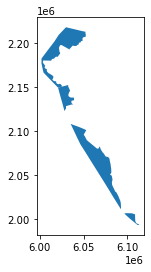

In [11]:
# Check for tracts with missing values

missing_tracts = access_gdf.loc[access_gdf["Avg_Distance"].isna()]
display(missing_tracts)
missing_tracts.plot();

## Vehicle Availability Layer

In [12]:
# Read in the vehicle availability data

vehicle_df = pd.read_csv("data/census/vehicle/vehicle_availability.csv")

print(vehicle_df.shape)
vehicle_df.head()

(569, 3)


,GEOID,Total_Households,No_Vehicle_Available
0,1400000US06001400100,1293,32
1,1400000US06001400200,847,39
2,1400000US06001400300,2441,371
3,1400000US06001400400,1802,170
4,1400000US06001400500,1606,186


In [13]:
# Calculate the percentage of households per census tract with no vehicles available

vehicle_df["Pct_Without_Vehicle"] = round((vehicle_df["No_Vehicle_Available"] / vehicle_df["Total_Households"])*100,1)

vehicle_df.head()

,GEOID,Total_Households,No_Vehicle_Available,Pct_Without_Vehicle
0,1400000US06001400100,1293,32,2.5
1,1400000US06001400200,847,39,4.6
2,1400000US06001400300,2441,371,15.2
3,1400000US06001400400,1802,170,9.4
4,1400000US06001400500,1606,186,11.6


In [14]:
# Check the null values

vehicle_df[vehicle_df["Pct_Without_Vehicle"].isna()]

,GEOID,Total_Households,No_Vehicle_Available,Pct_Without_Vehicle
360,1400000US06001990000,0,0,NaN
568,1400000US06013990000,0,0,NaN


In [15]:
# Fill the null values

vehicle_df["Pct_Without_Vehicle"].fillna(value=0, inplace=True)

# Check again for nulls
vehicle_df.isna().sum()

GEOID                   0
Total_Households        0
No_Vehicle_Available    0
Pct_Without_Vehicle     0
dtype: int64

In [16]:
# Trim the GEOID

vehicle_df["GEOID"] = vehicle_df["GEOID"].apply(lambda x: x[9:])

vehicle_df.head()

,GEOID,Total_Households,No_Vehicle_Available,Pct_Without_Vehicle
0,06001400100,1293,32,2.5
1,06001400200,847,39,4.6
2,06001400300,2441,371,15.2
3,06001400400,1802,170,9.4
4,06001400500,1606,186,11.6


In [17]:
# Merge the vehicle availability data into the accessibility layer

access_gdf = access_gdf.merge(vehicle_df, on="GEOID", how='left')

print(access_gdf.shape)
access_gdf.head()

(621, 6)


,GEOID,geometry,Avg_Distance,Total_Households,No_Vehicle_Available,Pct_Without_Vehicle
0,06001428301,"POLYGON ((6052475.926 2095914.933, 6052663.072...",38.0,2492.0,19.0,0.8
1,06001428302,"POLYGON ((6052287.465 2096919.257, 6052335.227...",31.0,2474.0,134.0,5.4
2,06001428400,"POLYGON ((6050238.370 2096212.064, 6052054.809...",6.0,1873.0,76.0,4.1
3,06001430900,"POLYGON ((6101137.659 2081426.591, 6101182.977...",30.0,1864.0,90.0,4.8
4,06001431000,"POLYGON ((6100691.400 2077938.162, 6100718.229...",33.0,1087.0,90.0,8.3


(102, 6)


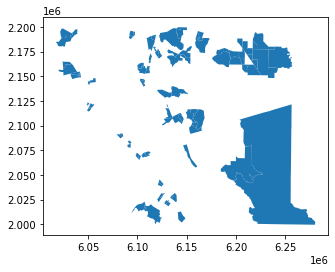

In [18]:
# Check for tracts with missing values

missing_tracts = access_gdf.loc[access_gdf["Pct_Without_Vehicle"].isna()]
print(missing_tracts.shape)
missing_tracts.plot();

## Need Level Layer
This layer categorizes census tracts into three levels of need for greater access to regional parks via transit: low (within 30 mins), medium (outside 30 mins, above average vehicle availability), and high (outside 30 mins, below average vehicle availability). Note: Average vehicle availability is 8%.

In [19]:
# Define the conditions and values of the new variable

condition_list = [
    (access_gdf["Avg_Distance"] <= 30),
    (access_gdf["Avg_Distance"] > 30) & (access_gdf["Pct_Without_Vehicle"] <= 8),
    (access_gdf["Avg_Distance"] > 30) & (access_gdf["Pct_Without_Vehicle"] > 8)
]

choice_list = [1, 2, 3]

In [20]:
# Add the new variable

access_gdf["Need_Level"] = np.select(condition_list, choice_list, default=np.nan)

print(access_gdf.shape)
access_gdf.head()

(621, 7)


,GEOID,geometry,Avg_Distance,Total_Households,No_Vehicle_Available,Pct_Without_Vehicle,Need_Level
0,06001428301,"POLYGON ((6052475.926 2095914.933, 6052663.072...",38.0,2492.0,19.0,0.8,2.0
1,06001428302,"POLYGON ((6052287.465 2096919.257, 6052335.227...",31.0,2474.0,134.0,5.4,2.0
2,06001428400,"POLYGON ((6050238.370 2096212.064, 6052054.809...",6.0,1873.0,76.0,4.1,1.0
3,06001430900,"POLYGON ((6101137.659 2081426.591, 6101182.977...",30.0,1864.0,90.0,4.8,1.0
4,06001431000,"POLYGON ((6100691.400 2077938.162, 6100718.229...",33.0,1087.0,90.0,8.3,3.0


In [21]:
# Check the distribution of values

access_gdf["Need_Level"].value_counts()

1.0    234
2.0    197
3.0    117
Name: Need_Level, dtype: int64

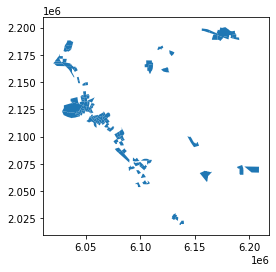

In [22]:
# Check the geographic distribution

access_gdf.loc[access_gdf["Need_Level"] == 3].plot();

## Save the Layer to File

In [25]:
# Save the processed accessibility data as a layer for mapping

access_gdf.to_file("data/accessibility.geojson", driver='GeoJSON', index=False)

# Check the saved file
gpd.read_file("data/accessibility.geojson").head()

,GEOID,Avg_Distance,Total_Households,No_Vehicle_Available,Pct_Without_Vehicle,Need_Level,geometry
0,06001428301,38.0,2492.0,19.0,0.8,2.0,"POLYGON ((6052475.926 2095914.933, 6052663.072..."
1,06001428302,31.0,2474.0,134.0,5.4,2.0,"POLYGON ((6052287.465 2096919.257, 6052335.227..."
2,06001428400,6.0,1873.0,76.0,4.1,1.0,"POLYGON ((6050238.370 2096212.064, 6052054.809..."
3,06001430900,30.0,1864.0,90.0,4.8,1.0,"POLYGON ((6101137.659 2081426.591, 6101182.977..."
4,06001431000,33.0,1087.0,90.0,8.3,3.0,"POLYGON ((6100691.400 2077938.162, 6100718.229..."
